## Machine Learning: Cleaveland Heart Disease Data

**Author:
<br> Md. Tariqul Islam
<br> B.Sc. Civil Engg. (KUET)**

In this notebook, we are working on part of the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+disease) data collection from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The complete collection consists of four individual databases collected from four different institutions located in Cleveland, Hungary, Switzerland, and the VA Long Beach.

Each of the datasets in the collection are present as more than one formats - Raw data and processed data. There are also reprocessed datasets for some instances. The raw datasets consist of unprocessed, unfiltered data whereas the processed versions of the same datasets consist of information processed and filtered specifically for machine learning purposes.

We will be using the processed version of the *Cleveland Dataset* from the aforementioned collection. The direct link to the dataset is: (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)

Our goal is to perform machine learning on this dataset using a Decision Tree algorithm to find out whether a patient has heart disease or not. The whole process is explained below step-by-step.

### Import Required Libraries

As mentioned above, we will be building a machine learning model based on our dataset. We will also create some visualizations from time to time in order to better understanding what is happening with our data and our model. Hence we will require the following libraries to be imported into our notebook.
- `pandas` for data manipulation
- `numpy` for numerical operations
- Specific modules from `sklearn` as required for Machine Learning related
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries mentioned above.

In [1]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np

# Import Libraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree # For building and plotting a classification Tree
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.model_selection import cross_val_score # For Cross-Validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # To create and plot a confusion matrix
from sklearn.metrics import classification_report # For generating the classification report
from sklearn.metrics import roc_curve, roc_auc_score # For creating and displaying the ROC curve and AUC value

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Dataset

The next step will be importing our data into the notebook. The processed cleveland dataset, as mentioned above, is saved in our harddrive as `processed.cleveland.data`. We can use the `pandas.read_csv()` function to import this data in our notebook as a pandas dataframe object.

In [2]:
# Import data from a CSV file
df = pd.read_csv("processed.cleveland.data")

### Explore the Data

It is a good practice to explore the newly imported data and get familiar with every aspects of the dataset before diving into any further operations. Spending a little extra time to understand the data in hand is always helpful in the long run for any data analysis and machine learning related tasks.

The simplest way of getting a good look at our data is to display the dataframe using the `display()` comamand. We will use the `dataframe.head()` method with an argument value of 10 to display only the first 10 rows of the dataframe. We will also display the dataframe shape using the `dataframe.shape` attribute to get an understanding of the number of features and observations present in the dataset.

In [3]:
# Display the dataframe data
display(df.head(10))
# Display Dataframe shape
display(df.shape)

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


(302, 14)

We can see the first 10 rows of our dataset along with the shape of the dataframe at bottom. But we can readily see that there is something wrong with our dataset.

If we look at the column names for our dataframe, we can see that each column is named with some numeric values instead of a specific column name. That's not much of a problem. The actual problem is that, upon close observations, we will see that the names of the columns are not actually column names, instead they are just the values from an observation row, being treated as the dataset header.

We can further verify this issue by looking at the dataset description at the source page. As we go through the data description given in the source page, we cannot find any information regarding the column headers there. But it is given as a summary at the top of the page that **the dataset contains a total of 303 observations**.

If we check the shape of our dataframe displayed above, we can see that our dataframe is currently containing only 302 observations. Thus we can be sure that **the column names being displayed in the dataframe above are actually values from an observation row**. In fact, pandas is considering the first row present in the dataset being imported as the dataset header and treating the values as column names.

To prevent pandas from treating the first row of data as column names, we will use the `header` argument available in the `pandas.read_csv()` function and set its value to `None`. So the corrected version of the above lines of code will be as follows.

In [4]:
# Import data from a CSV file with `header` set to `None`
df = pd.read_csv("processed.cleveland.data", header = None)

# Display the dataframe data
display(df.head(10))

# Display Dataframe shape
display(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(303, 14)

Now we can see that our column names have been replaced with integer numbers starting from 0, and the total number of observations present in the dataframe is 303, same as the number mentioned in the dataset source page.

The shape of the dataframe displayed above indicates that our dataset contains a total of 14 features and 303 observations.

### Dealing with the Column Names

Right now, the column names, or feature names, in our dataframe are set to integer numbers starting from 0 uptoto 13. These numbers do not give any idea about the data contained in the columns. Before proceeding with any data cleaning or machine learning operations, it is a good idea to rename the dataframe columns appropriately to represent the feature contained in the columns.

If we go through the dataset [source page](https://archive.ics.uci.edu/ml/datasets/heart+disease), we will see that the names of the features contained in this dataset are listed under the *Attribute Information* section, and the description of those features are also given just below that section.

After goingh through the descriptions given in the source page, we can identify and rename our dataframe columns as listed below.

- 0: **age** - The age of the patient, in years
- 1: **sex** - The sex/gender of the patient, represented as
        - 0 = female
        - 1 = male
- 2: **chestPain** - Type of Chest Pain present in the patient, represented as
        - 1 = typical angina
        - 2 = atypical angina
        - 3 = non-anginal pain
        - 4 = asymptomatic
- 3: **restingBP** - Resting blood pressure of the patient, in mmHg, during admission to the hospital
- 4: **cholestoral** - Serum cholestoral content of the patient, in mg/dl
- 5: **fastingBloodSugar** - Whether or not the Fasting Blood Sugar (FBS) of the patient is > 120 mg/dl, represented as
        - 0 = false
        - 1 = true
- 6: **restingECG** - resting electrocardiographic results of the patient, represented as
        - 0 = normal
        - 1 = having ST-T wave abnormality
        - 2 = showing probable or definitive left ventricular hypertropy by Estres' criteria
- 7: **thalMaxRate** - Maximum heart rate achieved during the Thallium Stress Test
- 8: **exAngina** - Presence of Excercise induced angina, represented as
        - 0 = no
        - 1 = yes
- 9: **oldPeak** - ST depression induced by exercise relative to rest
- 10: **slope** - The slope of the peak excercise ST segment, represented as
        - 1 = uploping
        - 2 = flat
        - 3 = downsloping
- 11: **ca** - Number of major vessels colored by flouroscopy (0~3)
- 12: **thalTest** = The result of Thallium Stress Test, represented as
        - 3 = normal
        - 6 = fixed defect
        - 7 = reversable defect
- 13: **heartDisease** = Diagnosis of heart disease, represented as
        - 0 = Does not have heart disease
        - 1 = Does have heart disease

#### Types of features
Since we have identified our dataset features, we can now classify them as numeric or categoric features based on the description of the data.

- **Numeric Features:** `age`, `restingBP`, `cholestoral`, `thalMaxRate`, `oldPeak`, `ca`
- **Categoric Features:** `sex`, `chestPain`, `fastingBloodSugar`, `restingECG`, `exAngina`, `slope`, `thalTest`, `heartDisease`

#### Target Feature
The target feature in the dataset for our machine learning is the `heartDisease` feature representing whether a patient has heart disease or not.

Now we can change our dataset column names using the following lines of code.

In [5]:
# Create a column names list
column_names = ["age", "sex", "chestPain", "restingBP", "cholestoral", "fastingBloodSugar", "restingECG", "thalMaxRate", "exAngina", "oldPeak", "slope", "ca", "thalTest", "heartDisease"]

# Set the column names in the dataframe
df.columns = column_names

# Display the result
display(df.head())

,age,sex,chestPain,restingBP,cholestoral,fastingBloodSugar,restingECG,thalMaxRate,exAngina,oldPeak,slope,ca,thalTest,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We have successfully changed our column names. Now we can proceed with data processing operations.

### Identifying Missing Values

One of the most crucial steps in data processing for machine learning is identifying and dealing with missing values. The process of identification and methods of dealing with the missing values vary from dataset to dataset, feature to feature.

The very first step for finding missing values is to display the dataframe information and analyze them.

In [6]:
# Display Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    float64
 1   sex                303 non-null    float64
 2   chestPain          303 non-null    float64
 3   restingBP          303 non-null    float64
 4   cholestoral        303 non-null    float64
 5   fastingBloodSugar  303 non-null    float64
 6   restingECG         303 non-null    float64
 7   thalMaxRate        303 non-null    float64
 8   exAngina           303 non-null    float64
 9   oldPeak            303 non-null    float64
 10  slope              303 non-null    float64
 11  ca                 303 non-null    object 
 12  thalTest           303 non-null    object 
 13  heartDisease       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


We can see that among the 14 features present in our dataset, there are 12 features with numeric data types, and 2 features with object data type.

But as we have already seen in the above section, all the data in our dataset are represented by numeric values, which means, in theory, all of the features in our data set should have been of numeric data types.

But as we can see, the **ca** and **thalTest** features are stored as object data type. This could happen if any or some of the data contained in those columns contain something other than numeric values. If that is the case, then those values will be considered as missing values.

We can easily get an idea of all the data in these columns by displaying the unique values contained in the columns.

In [7]:
# Display unique values in `ca` column
print("Unique values in `ca` column: ", df['ca'].unique())

# Display unique values in `thalTest` column
print("Unique values in `thalTest` column: ", df['thalTest'].unique())

Unique values in `ca` column:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in `thalTest` column:  ['6.0' '3.0' '7.0' '?']


As we can see above, along with numeric values as suggested in the dataset description above, these two columns contain some `?` values, which means that those are the missing values for that feature. As the `?` symbol is of character data type, the column datatype was changed to `object` datatype.

Let's find out how many rows contain missing values in these two columns.

In [8]:
# Display rows containing `?` in the specified columns
display(len(df.loc[
    (df['ca'] == '?') | (df['thalTest'] == '?')
]))

6

Now we can display these 6 rows containing the missing values.

In [9]:
# Display rows containing `?` in the specified columns
display(df.loc[
    (df['ca'] == '?') | (df['thalTest'] == '?')
])

,age,sex,chestPain,restingBP,cholestoral,fastingBloodSugar,restingECG,thalMaxRate,exAngina,oldPeak,slope,ca,thalTest,heartDisease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Although the dataframe info displayed above give us an idea that there aren't any more missing values present in the dataset, let's just be certain of that by checking the unique values in all the categorical feature columns and comparing them with the feature descriptions.

In [10]:
# List of Categorical Features
categorical_features = ["sex", "chestPain", "fastingBloodSugar", "restingECG", "exAngina", "slope", "thalTest", "heartDisease"]

# Display unique values in the categorical feature columns
print("Unique values in the Categorical Feature Columns:")
for feature in categorical_features:
    print(feature, ":\t", df[feature].unique())

Unique values in the Categorical Feature Columns:
sex :	 [1. 0.]
chestPain :	 [1. 4. 3. 2.]
fastingBloodSugar :	 [1. 0.]
restingECG :	 [2. 0. 1.]
exAngina :	 [0. 1.]
slope :	 [3. 2. 1.]
thalTest :	 ['6.0' '3.0' '7.0' '?']
heartDisease :	 [0 2 1 3 4]


As we can see from above, all the feature columns, except for the `thalTest` column, contain values as prescribed in the feature descriptions. So we are now certain that we have identified all the missing values successfully.

### Dealing with the Missing Values

Now that we have identified our missing values, it is time to deal with them. We can deal with these missing values beforehand in one of two ways - remove the missing values, or replace the missing values.

The choice of way depends on the size of the dataset, number of missing values, types of missing values, importance of the missing values, type of analysis to be performed, and many other factors.

In our case, the dataset contains 303 observations, among which 6 observations have missing values. If we remove the incomplete observations, we will be left with 297 observations.

As we are building a decision tree classifier, the number of 297 observations will not make any significant difference compared to the 303 observations. So, in this case, we can completely remove the observations with the missing values and move forward with only the complete observations.

Before removing our missing values, as a precaution, we will keep a backup of our current dataframe, and then remove the missing values from our dataframe. The following lines of code will do the job.

In [11]:
# Create Backup of the Dataframe
df_bak = df.copy()

# Remove missing values from `df`
df = df.loc[
            (df['ca'] != '?') & (df['thalTest'] != '?')
            ]

# Display the resulting dataframe shape
display(df.shape)

(297, 14)

We can see that our dataframe now contains 297 rows of observations which matches to the expected number of observations after removing the incomplete observations. But it doesn't hurt to be extra sure. So we can again display the unique values in our categorical feature columns, along with the unique values contained in the `ca` column to make sure that everyting matches our expectation.

In [12]:
# Display unique values in the categorical feature columns
print("Unique values in the Categorical Feature Columns:")
for feature in categorical_features:
    print(feature, ":\t", df[feature].unique())

# Display unique values in the `ca` column
print("\nUnique values in the `ca` Column: ", df["ca"].unique())

Unique values in the Categorical Feature Columns:
sex :	 [1. 0.]
chestPain :	 [1. 4. 3. 2.]
fastingBloodSugar :	 [1. 0.]
restingECG :	 [2. 0. 1.]
exAngina :	 [0. 1.]
slope :	 [3. 2. 1.]
thalTest :	 ['6.0' '3.0' '7.0']
heartDisease :	 [0 2 1 3 4]

Unique values in the `ca` Column:  ['0.0' '3.0' '2.0' '1.0']


As we can see from above, all our feature column values are now similar to that expected as per the feature descriptions. But as we can see in the case of our target variable, the unique values are listed as 0 through 4.

We will deal with this mismatch in the next section.

### Cleaning the Target Variable

As stated in the last section, our target variable should contain only `0` and `1`, but it currently contains integer values from `0` to `4`. If we go through the dataset source page, we can see that this is not due to any error or missing values.

The original data for this variable was classified as integers ranging from `0` to `4`. But for research purposes, the values used for this column are only `0` and `1` as mentioned in our feature descriptions above, with the modification to the values as
- 0: for values = 0
- 1: for values > 0

So, all we have to do now is filter the values in the `heartDisease` column that are *NOT `0`*, and replace them with the value `1`, and we will be good to go.

In [13]:
print(df["heartDisease"].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: heartDisease, dtype: int64


In [14]:
# Display the value counts in `heartDisease` column before Modification
print("Before Modification:")
print(df["heartDisease"].value_counts())

# Replace values in the `heartDisease` column
df["heartDisease"][df["heartDisease"] != 0] = 1

# Display the value counts in `heartDisease` column after Modification
print("After Modification:")
print(df["heartDisease"].value_counts())

Before Modification:
0    160
1     54
2     35
3     35
4     13
Name: heartDisease, dtype: int64
After Modification:
0    160
1    137
Name: heartDisease, dtype: int64


As we can see above, the number of observations before and after the modification remained unchanged for class `0`, whereas the value count for class `1` after modification has been changed to the sum of all the classes other than `0` before the modification.

Hence, we can say that our modification was successfull and the data cleaning is complete.

### Encoding the Categorical Features


The main purpose of encoding the categorical features is to convert text data into numeric data for the machine learning algorithm to be able to process them. But as we have seen already, all the categorical features in our dataset are already in numerical formats. So the question is, **how will we encode it?**

The categorical features in our dataset are already encoded as numeric values in a format called the *Label Encoding*. In this encoding method, each of the unique values in the categorical feature is associated with an integer value and the integer value is stored in the dataframe instead of the actual value. But this gives rise to another problem: Continuity or Ranking.

As seen above, all the categorical features in our dataset are labeled sequentially using integer values. Despite us humans being able to understand them as individual and discrete representation of categoric values, the computer or, more specifically, the ML algorithm process them as continuous numeric values.

But where is the problem with that? As it happens, when these numbers are treated as continuous values, the values become mathematically related. So, if there were say 10 categories in a column numbered 0 through 9, a category labeled as 4 will be considered more similar and closer to the one numbered 1 than the one numbered 8. Also the value 9 will be treated with higher importance than the value 5, or even 8. In essence, there happens to be a ranking issue between the categories, even if there might not be any ranking or comparison between the actual categories.

This problem can be eliminated by use of another encoding method called the **One-Hot Encoding**. In this method, each class in a category gets their own individual column, and the column values only contains `0`, or `1`. So, for any observation, the column respective to the class value of that observation will be given a value of `1`, and rest of the columns representing classes of that feature will get values of `0`.

Although this process increases the number of columns or features significantly, especially when there are multiple categorical features and lots of unique classes in the individual features, as each of the classes get only values of 0 or 1, the classes are treated as equal and no ranking issue arises.

The ranking between the observation value is a very important factor in the Decision Tree algorithm, and it can affect the classification result to a considerable extent. That's why we are going to encode all our categorical features using the One-Hot encoding method.

But before the encoding, we need to consider another fact. As we mentioned that our One-Hot encoded columns will be given values of `0` and `1` only, we don't need to encode the categorical columns that already contains only the values of `0` and `1`. Hence, we will encode only those categorical columns that contain more than two unique values. This means that the features named `chestPain`, `restingECG`, `slope`, and `thalTest` will be the ones being encoded.

We will be using the `pandas.get_dummies()` method for this purpose and pass the column names to be encoded as a list to the `columns` argument.

In [15]:
# One-Hot Encode the categorical features
df = pd.get_dummies(df, columns = ["chestPain", "restingECG", "slope", "thalTest"])

# Display the result
display(df.head())
display(df.shape)

,age,sex,restingBP,cholestoral,fastingBloodSugar,thalMaxRate,exAngina,oldPeak,ca,heartDisease,...,chestPain_4.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,slope_1.0,slope_2.0,slope_3.0,thalTest_3.0,thalTest_6.0,thalTest_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


(297, 23)

We can see that our dataframe now contains 297 observations, same as before. But the number of columns has changed from 14 to 23. This indicates that our last operation has introduced new columns into our dataframe.

Let's display the column names and try to understand what actually happened.

In [16]:
# Display column names
display(df.columns)

Index(['age', 'sex', 'restingBP', 'cholestoral', 'fastingBloodSugar',
       'thalMaxRate', 'exAngina', 'oldPeak', 'ca', 'heartDisease',
       'chestPain_1.0', 'chestPain_2.0', 'chestPain_3.0', 'chestPain_4.0',
       'restingECG_0.0', 'restingECG_1.0', 'restingECG_2.0', 'slope_1.0',
       'slope_2.0', 'slope_3.0', 'thalTest_3.0', 'thalTest_6.0',
       'thalTest_7.0'],
      dtype='object')

As we can see, the columns that we chose for One-Hot encoding have been removed from the dataframe, and some new columns have been added to the end of the datast with the column names set to a combination of the feature name and the class name connected by an `_` character.

For example, the unique values in the `chestPain` column were the numbers `1.0` through `4.0`. We can see that this feature column has been divided into four individual columns named as `chestPain_1.0`, `chestPain_2.0`, `chestPain_3.0`, and `chestPain_4.0`. Similarly the other columns have also been divided into multiple columns.

Let's display some values from the new `chestPain_##` columns only and see what actually happened there.

In [17]:
# Display the new "chestPain_##" columns
display(df[["chestPain_1.0", "chestPain_2.0", "chestPain_3.0", "chestPain_4.0"]].sample(10))

,chestPain_1.0,chestPain_2.0,chestPain_3.0,chestPain_4.0
90,0,0,0,1
95,0,0,0,1
73,0,0,0,1
161,0,0,0,1
176,0,0,0,1
65,0,0,0,1
82,0,0,1,0
154,0,0,0,1
197,0,0,0,1
59,1,0,0,0


It can be seen from above that the column values are set only to `0` and `1`. It may also be noted that for any particular observation, only one of the column values is `1`, and rest of the values are `0`. So we can conclude that our One-Hot encoding was successful.

### Separate the Features and Target Variable

We have completed processing our data. We have also identified our features and the target variable. It is time to separate the features and the target variable into individual dataframes before proceeding into Machine Learning.

In [18]:
# Create the Features dataframe
X = df.drop(columns = ["heartDisease"], axis = 1).copy()

# Create the Target Dataframe
y = df[["heartDisease"]].copy()

Our dataset has now been separated into features and target variable.

### Split the Data into Train Set and Test Set

The next step for building a ML model is to split the available data into training and test set. The basic concept is to use part of the available data for training the model and, after training, to use the rest of the data to test the trained model accuracy.
<br>Usually the train set consists of 80% of the available data, and the test set consists of the rest 20% data. The splitting or sampling is done randomly so as to diversify the observations present in either the test set or the train set.

The splitting is done by using the `train_test_split()` function from `SciKit Learn`.
A `random_state` value is provided to the function along with other arguments so that the randomization is fixed and the whole splitting process can be recreated later for comparison purposes. We will be providing `random_state = 47` as the function argument.
We will also set the `stratify` argument to `True` so that the distribution of the classes of our target variable remain same in both the train and test sets.

In [19]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47, stratify = y)

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (237, 22)
y_train shape:  (237, 1)
X_test shape:  (60, 22)
y_test shape:  (60, 1)


### Train a Decision Tree Model

Now we will create a Desicion Tree model based on the train set data to predict wheter a patient has heart disease or not.

We will first need to create an instance of the `DecisionTreeClassifier()` model in our environment, and then fit our training data to the model.

In [20]:
# Create a model instance
model = DecisionTreeClassifier(random_state = 47)

# Fit data to model
model = model.fit(X_train, y_train)

We have trained our model using our training data. Now we can see a diagram of the decision tree we've just made using the `plot_tree()` function from `SciKit Learn`.

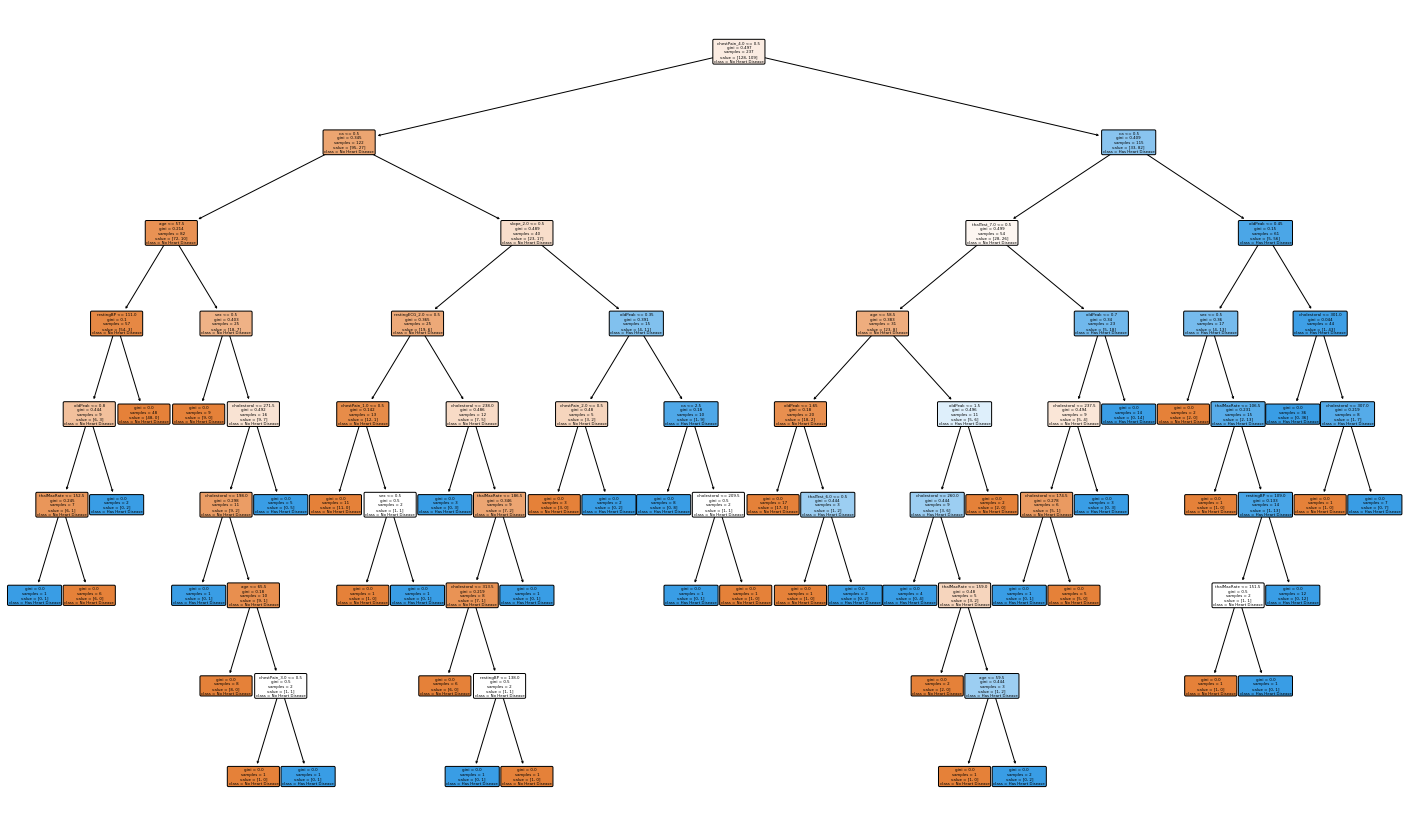

In [21]:
# Plot the Tree Diagram
plt.figure(figsize = (25,15))
plot_tree(model,
          filled = True,
          rounded = True,
          class_names = ["No Heart Disease", "Has Heart Disease"],
          feature_names = X.columns
         )

# Show the plot
plt.show()

As we can see, we have ended up with a very large decision tree and the values in the tree are completely unreadable. We can use the `max_depth` parameter in the above function to plot only a small top portion of the tree.

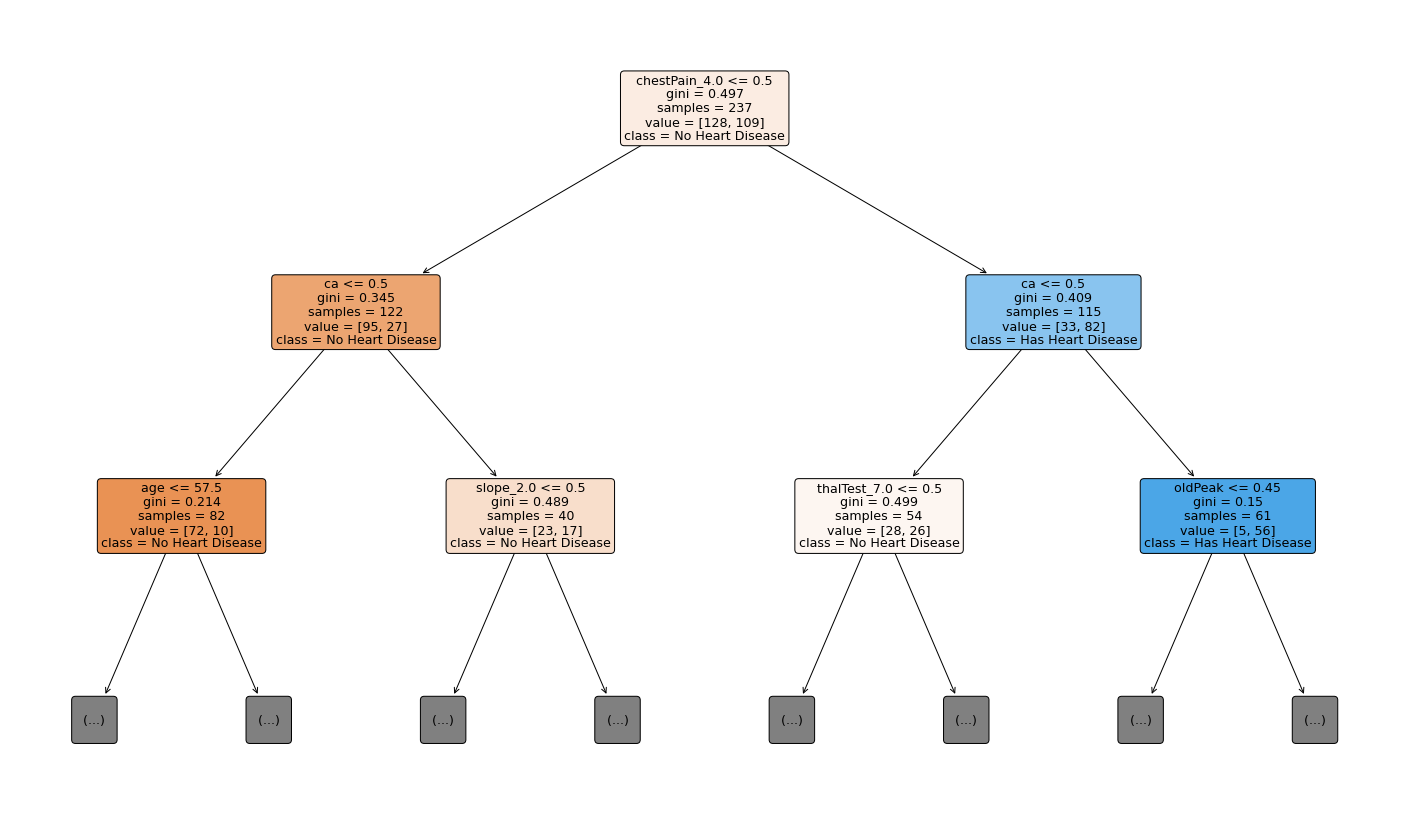

In [22]:
# Plot the Tree Diagram
plt.figure(figsize = (25,15))
plot_tree(model,
          filled = True,
          rounded = True,
          class_names = ["No Heart Disease", "Has Heart Disease"],
          feature_names = X.columns,
          max_depth = 2
         )

# Show the plot
plt.show()

We can now see the tree values more clearly for the top part of the tree.

### Predict Data using the Model

We can now predict data from our model using the test dataset.

In [23]:
# Predict from the test set features
y_pred = model.predict(X_test)

### Evaluate Model Performance

We have created a model, trained it using our dataset, and seen a diagram of the resulting decision tree. The next step is to evaluate the model performacne based on different evaluation metrics available. Following are examples of some of the evaluation metrics.

#### Confusion Matrix

A confusion matrix is an easy way to classify the correct and incorrect predicitons made by a model. It can be represented as both a matrix form or a graphical form. Below is a graphical representation of the confusion matrix for our model.

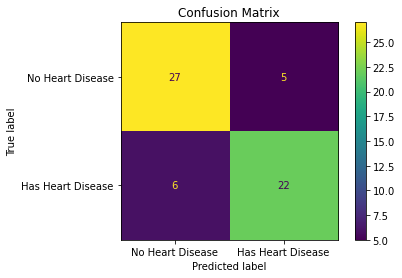

In [24]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      display_labels = ["No Heart Disease", "Has Heart Disease"],
                     )

plt.title("Confusion Matrix")
plt.show()

The confusion matrix for our model above shows that our model is being able to identify the patients with or without heart disease significantly well. The true positive and true negative values are significantly higher than the false positive and false negative values.

#### Classification Report

An easy way to determine the most common evaluation metrics from a model is to generate the classification report. It can be done by using the `classification_report()` command available in `sciKit Learn`.

In [25]:
# Generate and siaplay the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



The classification report presented above gives us a quick overview of the model performance. We can see from the report above that the precision, recall and the f1-score values are around 80%, which means the model is performing very well on the test dataset.

#### ROC Curve and ROC-AUC Score

ROC curve is a visual representation of a model's performance at different classification thresholds. The AUC value is a numerical representation of the model's performance.

The ROC and AUC for our model can be determined as follows.

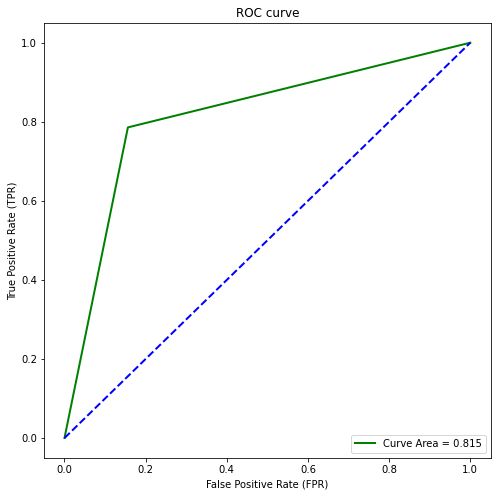

In [26]:
# Get the prediction probabilites
y_pred_proba = model.predict_proba(X_test)[:,1]

# Generate the ROC values
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

# Evaluate AUC value
auc = np.round(roc_auc_score(y_test, y_pred), 3)

# Plot the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve above shows that the model will perform best when the TPR or Recall value of the model is just near to 80% and the FPR value will be around 16%. The AUC value is 0.815, which is very good considering our preliminary model.

All the precision metrics shown above indicates that our preliminary decision tree classifier is performing significantly well. But there are still scopes to improve the model performance by tweaking different hyperparameter values.

Although the preliminary model performance is proven satisfactory, optimizations should be made for achieving better performance from the model.